In [ ]:
pip install transformers peft datasets accelerate bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained("gpt2-large")
model = AutoModelForCausalLM.from_pretrained("gpt2-large")

tokenizer.pad_token = tokenizer.eos_token

device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
input_text = "The future of education is"
inputs = tokenizer(input_text, return_tensors="pt").to(device)
outputs = model.generate(**inputs, max_length=50)

print(tokenizer.decode(outputs[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


The future of education is in the hands of the students.

"We are not going to be able to do anything about it. We are not going to be able to change it. We are not going to be able to change it.


In [ ]:
from peft import LoraConfig, get_peft_model, TaskType

lora_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["c_attn"],
    lora_dropout=0.1,
    bias="none",
    task_type=TaskType.CAUSAL_LM
)
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

trainable params: 1,474,560 || all params: 775,504,640 || trainable%: 0.1901


/usr/local/lib/python3.11/dist-packages/peft/tuners/lora/layer.py:1264: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d thevirusx3/automated-essay-scoring-dataset

Dataset URL: https://www.kaggle.com/datasets/thevirusx3/automated-essay-scoring-dataset
License(s): unknown


In [ ]:
!unzip automated-essay-scoring-dataset.zip

Archive:  automated-essay-scoring-dataset.zip
  inflating: Essay_Set_Descriptions/Essay_Set_Descriptions/Essay Set #1--ReadMeFirst.docx  
  inflating: Essay_Set_Descriptions/Essay_Set_Descriptions/Essay Set #2--ReadMeFirst.docx  
  inflating: Essay_Set_Descriptions/Essay_Set_Descriptions/Essay Set #3--ReadMeFirst.docx  
  inflating: Essay_Set_Descriptions/Essay_Set_Descriptions/Essay Set #4--ReadMeFirst.docx  
  inflating: Essay_Set_Descriptions/Essay_Set_Descriptions/Essay Set #5--ReadMeFirst.docx  
  inflating: Essay_Set_Descriptions/Essay_Set_Descriptions/Essay Set #6--ReadMeFirst.docx  
  inflating: Essay_Set_Descriptions/Essay_Set_Descriptions/Essay Set #7--ReadMeFirst.docx  
  inflating: Essay_Set_Descriptions/Essay_Set_Descriptions/Essay Set #8--ReadMeFirst.docx  
  inflating: Essay_Set_Descriptions/Essay_Set_Descriptions/Guidelines for Transcribing Student Essays.docx  
  inflating: Essay_Set_Descriptions/Essay_Set_Descriptions/essay_set_descriptions.xlsx  
  inflating: Trainin

In [ ]:
import pandas as pd

df = pd.read_csv('/content/test_set.tsv', encoding="latin1", sep="\t")
df.head()

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,2383,1,I believe that computers have a positive effec...,2383,NaN
1,2384,1,"Dear @CAPS1, I know some problems have came up...",2384,NaN
2,2385,1,"Dear to whom it @MONTH1 concern, Computers are...",2385,NaN
3,2386,1,"Dear @CAPS1 @CAPS2, @CAPS3 has come to my atte...",2386,NaN
4,2387,1,"Dear Local newspaper, I think that people have...",2387,NaN


In [ ]:
from datasets import Dataset

dataset = Dataset.from_pandas(df[['essay']])

def tokenize_function(examples):
    tokens = tokenizer(examples["essay"], truncation=True, padding="max_length", max_length=512)
    tokens["labels"] = tokens["input_ids"].copy()
    return tokens

tokenized_dataset = dataset.map(tokenize_function, batched=True, remove_columns=["essay"])

Map:   0%|          | 0/4254 [00:00<?, ? examples/s]

In [ ]:
import transformers
print(transformers.__version__)

4.51.3


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./gpt2-lora-finetuned",
    overwrite_output_dir=True,
    num_train_epochs=2,
    per_device_train_batch_size=1,
    gradient_accumulation_steps=8,
    learning_rate=2e-4,
    save_steps=100,
    save_total_limit=2,
    logging_steps=10,
    fp16=True,
    report_to="none"
)

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    tokenizer=tokenizer,
)

trainer.train()

<ipython-input-12-1a3c6e8c18c8>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Step,Training Loss
10,7.020900
20,4.192600
30,2.257300
40,1.958100
50,1.666400
60,1.673200
70,1.632000
80,1.668400
90,1.572400
100,1.589300


TrainOutput(global_step=1062, training_loss=1.5807255888164828, metrics={'train_runtime': 1925.2938, 'train_samples_per_second': 4.419, 'train_steps_per_second': 0.552, 'total_flos': 1.852290960457728e+16, 'train_loss': 1.5807255888164828, 'epoch': 1.996708979783733})

In [ ]:
base_model = AutoModelForCausalLM.from_pretrained("gpt2-large").to(device)
base_model.eval()

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 1280)
    (wpe): Embedding(1024, 1280)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-35): 36 x GPT2Block(
        (ln_1): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=3840, nx=1280)
          (c_proj): Conv1D(nf=1280, nx=1280)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=5120, nx=1280)
          (c_proj): Conv1D(nf=1280, nx=5120)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=1280, out_features=50257, bias=False)
)

In [ ]:
references = [
    "The essay is well-organized but needs more examples.",
    "Good structure and clear argument, but grammatical errors present.",
    "Ideas are interesting but lack supporting evidence.",
    "The essay is persuasive but could be more concise.",
    "Good grammar and vocabulary usage, needs stronger conclusion.",
    "Logical flow is good, but lacks depth in analysis.",
    "Essay responds to the prompt well but has poor paragraph transitions.",
    "Great introduction, but the body paragraphs are weak.",
    "Clear writing style but missing citations for some claims.",
    "Essay covers important points but lacks emotional impact."
]


In [ ]:
import evaluate

bleu = evaluate.load("bleu")
rouge = evaluate.load("rouge")

base_predictions = []
fine_predictions = []

for idx in range(10):
    input_text = df['essay'][idx]

    inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)

    with torch.no_grad():
        base_outputs = base_model.generate(**inputs, max_new_tokens=50)
    base_feedback = tokenizer.decode(base_outputs[0], skip_special_tokens=True)
    base_predictions.append(base_feedback)

    with torch.no_grad():
        fine_outputs = model.generate(**inputs, max_new_tokens=50)
    fine_feedback = tokenizer.decode(fine_outputs[0], skip_special_tokens=True)
    fine_predictions.append(fine_feedback)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene

In [ ]:
bleu_base = bleu.compute(predictions=base_predictions, references=[[ref] for ref in references])
bleu_fine = bleu.compute(predictions=fine_predictions, references=[[ref] for ref in references])

rouge_base = rouge.compute(predictions=base_predictions, references=references)
rouge_fine = rouge.compute(predictions=fine_predictions, references=references)

print(f"Base BLEU: {bleu_base['bleu']*100:.2f}%")
print(f"Fine-Tuned BLEU: {bleu_fine['bleu']*100:.2f}%")

print(f"Base ROUGE-L: {rouge_base['rougeL']*100:.2f}%")
print(f"Fine-Tuned ROUGE-L: {rouge_fine['rougeL']*100:.2f}%")


Base BLEU: 0.00%
Fine-Tuned BLEU: 0.00%
Base ROUGE-L: 1.50%
Fine-Tuned ROUGE-L: 1.57%


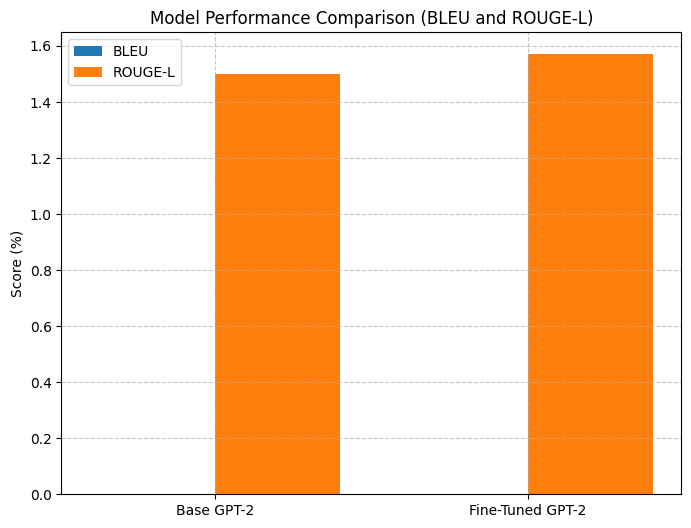

In [ ]:
import matplotlib.pyplot as plt

models = ['Base GPT-2', 'Fine-Tuned GPT-2']
bleu_scores = [bleu_base['bleu']*100, bleu_fine['bleu']*100]
rouge_scores = [rouge_base['rougeL']*100, rouge_fine['rougeL']*100]

x = range(len(models))

plt.figure(figsize=(8,6))

plt.bar([i-0.2 for i in x], bleu_scores, width=0.4, label='BLEU', align='center')
plt.bar([i+0.2 for i in x], rouge_scores, width=0.4, label='ROUGE-L', align='center')

plt.xticks(x, models)
plt.ylabel('Score (%)')
plt.title('Model Performance Comparison (BLEU and ROUGE-L)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import json

input_text = df['essay'][0]

inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
outputs = model.generate(**inputs, max_new_tokens=50)
generated_feedback = tokenizer.decode(outputs[0], skip_special_tokens=True)

structured_output = {
    "feedback": generated_feedback,
    "comments": [
        "Work on clarity and coherence.",
        "Use more specific examples."
    ],
    "score_estimation": 7
}

print(json.dumps(structured_output, indent=2))


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


{
  "feedback": "I believe that computers have a positive effect on people. They help you stay in touch with family in a couple different ways they excercise your mind and hands and help you learn and make things easier. Computer's help you keep in touch with people. Say you live in @LOCATION1 and you miss your @CAPS1. You can just send an e-mail and talk all you want. If you don't just want to limit it to words you can add pictures so they can see how much you've grown or if you are well. Even if you're just e-mailing someone down the block it is just as effective as getting up and walking over there. You can also use a computer to make a scrap book card or slide show to show how much you love the person you give them to. Computers @MONTH1 not excercise you whole body but it excersises you mind and hands. You could play solitaire on the computer and come away @PERCENT1 smarter than before. You can play other games of strategy like checkers and chess while still sitting at home being c